In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import metrics

In [266]:
%run functions.py

In [267]:
df_train_clean = pd.read_csv('../data/train_clean.csv')
df_test_clean = pd.read_csv('../data/test_clean.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Linear Regression Model

Define feature matrix X and target vector y.

In [268]:
features = df_train_clean.columns.drop('saleprice')
features

Index(['ms_zoning', 'lot_area', 'condition_1', 'overall_qual', 'overall_cond',
       'year_built', 'year_remod/add', 'exter_qual', 'exter_cond', 'bsmt_qual',
       'bsmt_cond', 'bsmt_unf_sf', 'total_bsmt_sf', 'central_air',
       '1st_flr_sf', 'gr_liv_area', 'full_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'fireplaces', 'garage_cars',
       'garage_area', 'garage_qual', 'garage_cond', 'paved_drive', 'yr_sold',
       'age', 'quality', 'remod', 'bsmt_rating', 'bsmt_sf'],
      dtype='object')

In [269]:
features = df_train_clean.columns.drop(['saleprice', 'yr_sold', 'year_built'])
features

Index(['ms_zoning', 'lot_area', 'condition_1', 'overall_qual', 'overall_cond',
       'year_remod/add', 'exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond',
       'bsmt_unf_sf', 'total_bsmt_sf', 'central_air', '1st_flr_sf',
       'gr_liv_area', 'full_bath', 'bedroom_abvgr', 'kitchen_abvgr',
       'kitchen_qual', 'fireplaces', 'garage_cars', 'garage_area',
       'garage_qual', 'garage_cond', 'paved_drive', 'age', 'quality', 'remod',
       'bsmt_rating', 'bsmt_sf'],
      dtype='object')

In [270]:
X = df_train_clean[features].copy()
y = df_train_clean['saleprice']

Split the data into train data and test data.

In [271]:
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state=42)

Instantiate the linear regression model.

In [272]:
model = LinearRegression()

Fit the model over the train data X_train and y_train.

In [273]:
model.fit(X_train, y_train)

LinearRegression()

Predict the SalePrice using the test data.

In [274]:
y_pred = model.predict(X_test)

Evaluate the model.  
Calculate the Training score, Test score, and Baseline score.

In [275]:
calc_scores(model, X_train, y_train, X_test, y_test)

Train score  0.81449120131137
Test score   0.8475979373112059
Baseline     0.7617469339345273


In [276]:
resids = y_test - y_pred

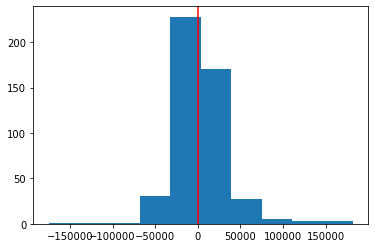

In [277]:
resids.hist(grid=False);
plt.axvline (0, color='red');

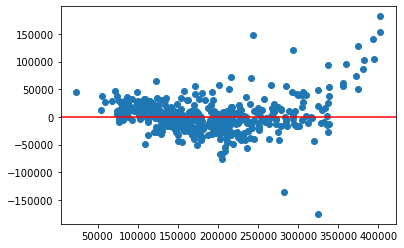

In [278]:
plt.scatter(y_pred, resids)
plt.axhline(0, color='r');

In [279]:
calc_metrics(y_test, y_pred)

RMSE 32061.88717806921
MSE  1027964609.4192387
R2   0.8475979373112059
MAE  21534.006242212447


#### For 1 unit increase (square foot) in gr_liv_area, holding all other variables constant, we can expect the average price of a home to increase by $43.

In [280]:
model.intercept_

2839220.773393864

In [281]:
coef = zip(X_test.columns, model.coef_)
df_coef = pd.DataFrame(coef, columns=['Feature', 'Coefficient']).sort_values(by='Coefficient', ascending=False)
df_coef

,Feature,Coefficient
3,overall_qual,14601.557018
6,exter_qual,14593.357442
22,garage_qual,13381.679934
20,garage_cars,13335.222523
18,kitchen_qual,13283.496715
19,fireplaces,6124.364058
8,bsmt_qual,6041.680739
12,central_air,3940.045778
4,overall_cond,3449.871565
28,bsmt_rating,2931.334582


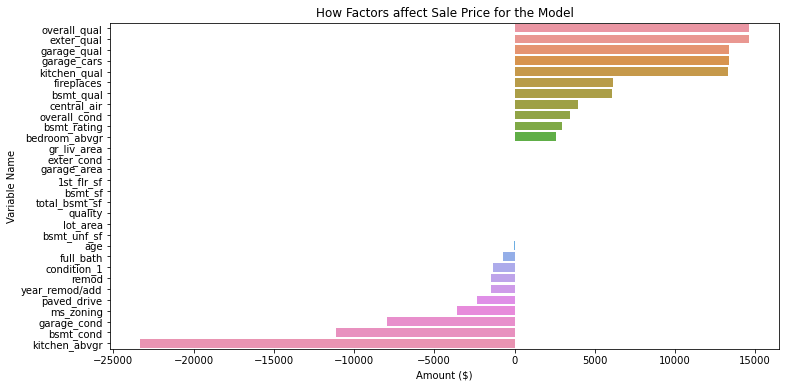

In [282]:
plt.figure(figsize=(12,6))
plt.title('How Factors affect Sale Price for the Model')
ax = sns.barplot(x='Coefficient', y='Feature', data=df_coef)
ax.set(xlabel='Amount ($)', ylabel='Variable Name');